/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:38: RuntimeWarning: [WARN] In file /home/sudarshan/shogun/src/shogun/lib/tapkee/tapkee_shogun.cpp line 35: The neighborhood graph is not connected.



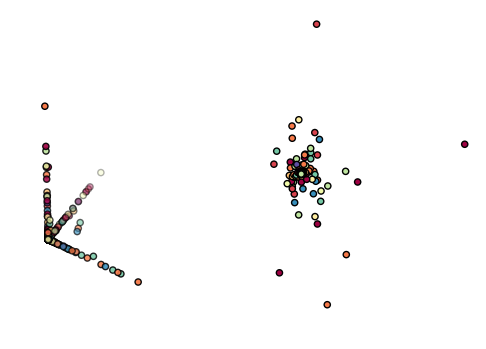

In [2]:
%matplotlib inline
import numpy as np

#The scikit-example for this notebook
#is here - http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

from scipy.io import loadmat, savemat
from numpy    import random
from os       import path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


mat  = loadmat('usps.mat')
Xall = mat['data']
Xall_ = np.resize(Xall, (256, 1024))

#print Xall_
#print Xall_.shape
Yall = np.array(mat['label'].squeeze(), dtype=np.double)
Yall_ = np.resize(Yall, (1024, ))
def plot(data, embedded_data, colors='m'):
	fig = plt.figure()
	fig.set_facecolor('white')
	ax = fig.add_subplot(121,projection='3d')
	ax.scatter(data[0],data[1],data[2],c=colors,cmap=plt.cm.Spectral)
	plt.axis('tight'); plt.axis('off')
	ax = fig.add_subplot(122)
	ax.scatter(embedded_data[0],embedded_data[1],c=colors,cmap=plt.cm.Spectral)
	plt.axis('tight'); plt.axis('off')
	plt.show()

from modshogun import StochasticProximityEmbedding, RealFeatures, HessianLocallyLinearEmbedding

data, colors = Xall_, Yall_
features = RealFeatures(data)

converter = HessianLocallyLinearEmbedding()
converter.set_target_dim(2)

embedded_features = converter.embed(features)
embedded_data = embedded_features.get_feature_matrix()

#print converter.get_reconstruction_shift()

plot(data, embedded_data, colors)